In [1]:
# DBSCAN (Density-based spatial clustering of application with noise)(군집화)
# 나영채

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터 세팅

In [4]:
#x|y|표준편차|갯수
def dset(x,y,s,n):
    data = np.array([np.random.normal(x, s, n),np.random.normal(y, s, n)])
#     data[0] = data[0]/np.max(data[0])
#     data[1] = data[1]/np.max(data[1])
    return data

In [5]:
a = dset(4, 4, 0.4, 70)
b = dset(5, 5, 0.4, 70)
c = dset(8, 5, 0.4, 70)
d = dset(8, 8, 1, 10)
data = np.array([np.concatenate((a[0],b[0],c[0],d[0])), np.concatenate((a[1],b[1],c[1],d[1]))])
data_len = len(data[0])

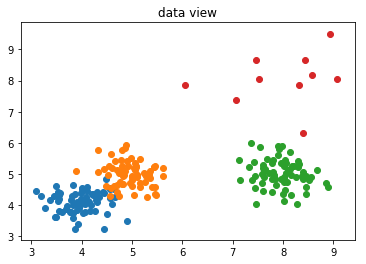

In [6]:
plt.scatter(a[0],a[1])
plt.scatter(b[0],b[1])
plt.scatter(c[0],c[1])
plt.scatter(d[0],d[1])
plt.title("data view")
plt.show()

In [7]:
# 스케일링

In [8]:
def scale(data):
    if(np.max(data)-np.min(data)==0): # x/0 에러 처리
        return (data-np.min(data))/(1.0/np.max(data))
    else:
        return (data-np.min(data))/(np.max(data)-np.min(data))

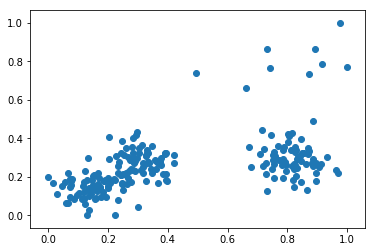

In [9]:
data = np.array([scale(data[0]),scale(data[1])])
plt.scatter(data[0], data[1])
plt.show()

In [10]:
# 알고리즘

In [11]:
# 파라미터
e = 0.05
n = 3

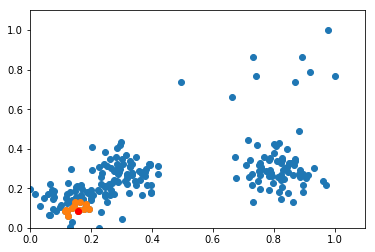

In [12]:
# 서로간의 거리 2차원
distance = np.array([[np.sqrt((data[0,i]-data[0,j])**2 + (data[1,i]-data[1,j])**2) for j in range(data_len)] for i in range(data_len)])
a = 2
arr = []
for i in range(data_len):
    if distance[a,i] < e:
        arr += [data.T[i]]
arr = np.array(arr)
plt.axis([0, 1.1, 0, 1.1])
plt.scatter(data[0], data[1])
plt.scatter(arr.T[0],arr.T[1])
plt.scatter(data[0,a],data[1,a],c='r')
plt.show()

196


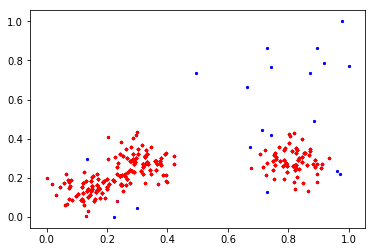

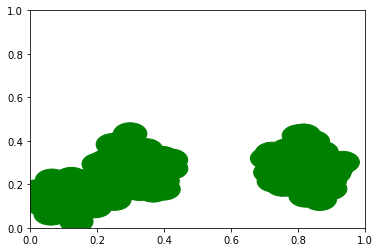

In [13]:
# 거리계산
distance = np.array([[np.sqrt((data[0,i]-data[0,j])**2 + (data[1,i]-data[1,j])**2) for j in range(data_len)] for i in range(data_len)])

# 결과
core = []      #핵심벡터
outskirts = [] #외각벡터

# 이동
for i in range(data_len):
    neighbors = []
    
    # 데이터 탐색
    for j in range(data_len):
        # 범위안의 데이터 (이웃의 인덱스저장)
        if distance[i,j] <= e:
            neighbors += [j]
            
    # 본인이 핵심벡터일 경우
    if len(neighbors) >= n:
        core += [i]
        outskirts += neighbors
    
# i 점의 핵심백터
print(len(core))
plt.scatter(data[0], data[1],c='b',s=5)
plt.scatter([data[0,i] for i in outskirts],[data[1,i] for i in outskirts],c='r',s=5)
plt.show()


for i in core:
    circle = plt.Circle((data.T[i,0],data.T[i,1]), radius=e ,color='g')
    plt.gca().add_patch(circle)
plt.show()

In [14]:
def debug(d1,d2):
    plt.axis([0, 1.1, 0, 1.1])
    plt.scatter(data[0], data[1])
    plt.scatter(arr.T[0],arr.T[1])
#     plt.scatter(data[0,i],data[1,i],c='r')
    plt.scatter(d1,d2,c='r')
    plt.show()

In [15]:
print(distance)

[[ 0.          0.17644586  0.14772835 ...,  0.90488733  0.99959724
   0.88004452]
 [ 0.17644586  0.          0.09766739 ...,  1.05404049  1.15600453
   1.04474069]
 [ 0.14772835  0.09766739  0.         ...,  0.96821565  1.07382168
   0.96922826]
 ..., 
 [ 0.90488733  1.05404049  0.96821565 ...,  0.          0.12967144
   0.190742  ]
 [ 0.99959724  1.15600453  1.07382168 ...,  0.12967144  0.          0.16361326]
 [ 0.88004452  1.04474069  0.96922826 ...,  0.190742    0.16361326  0.        ]]


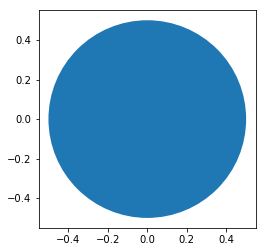

In [16]:
circle = plt.Circle((0,0), radius=0.5)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

In [17]:
print(data)

[[ 0.12319047  0.06101869  0.15636322  0.06544773  0.05739179  0.16732965
   0.22145037  0.20718624  0.07437017  0.11366124  0.11711332  0.1738749
   0.15300483  0.07353412  0.25150464  0.14756801  0.11700451  0.18196232
   0.24613003  0.1517795   0.20137016  0.24468692  0.16202661  0.24892802
   0.13614986  0.07519634  0.22469921  0.13635546  0.23359737  0.14930524
   0.13774531  0.19395942  0.12989504  0.12289502  0.26263408  0.18596152
   0.13280821  0.12967054  0.0306203   0.04614289  0.22478976  0.20039374
   0.          0.09818438  0.23256512  0.30063396  0.12158502  0.07670986
   0.16121864  0.14779404  0.25930288  0.12001747  0.10260499  0.17768802
   0.07981633  0.12086864  0.16839451  0.06637752  0.08504793  0.18830142
   0.16975788  0.18961751  0.15179223  0.19943842  0.01734745  0.17276243
   0.14350747  0.24454963  0.16555903  0.07211893  0.27577216  0.28401999
   0.37485244  0.28793137  0.32651483  0.39034335  0.28922789  0.33299833
   0.31798847  0.2846235   0.32606758  